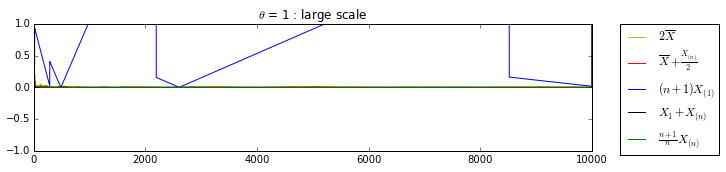

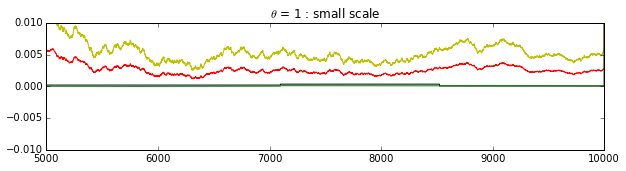

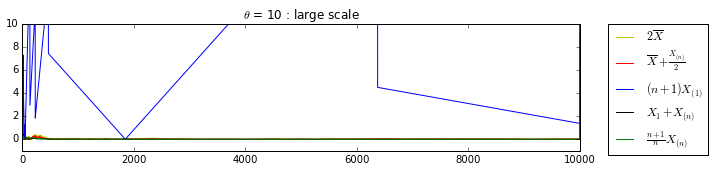

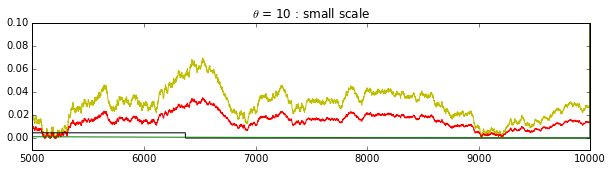

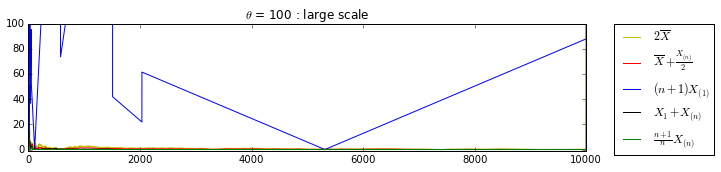

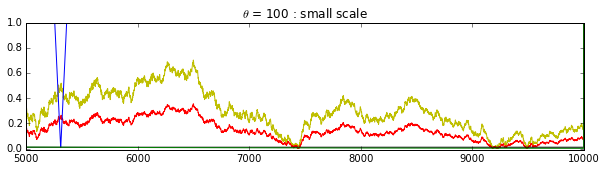

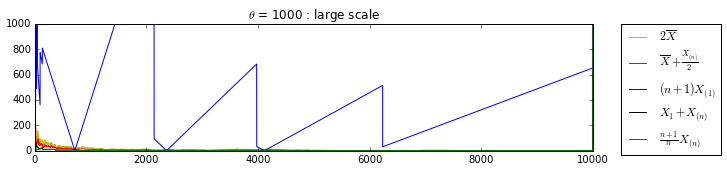

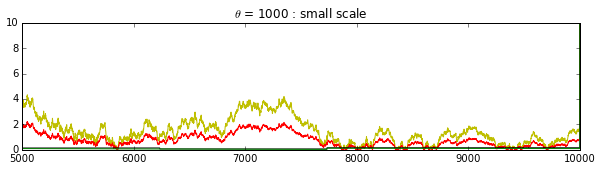

Как видно из графиков, лучшие оценки:


{\frac{n + 1}{n}X_{(n)}, X_{1} + X_{(n)}}

In [9]:
import numpy as nmp
import scipy as scp
import matplotlib.pyplot as plt
#import sympy as sy
from sympy import Symbol
%matplotlib inline

N = 10000
Axis_x = nmp.arange(0, N, 1)


# зададим функцию, которая будет рисовать графики
def line_options(arg, arg1, arg2, arg3, arg4, arg5):
    plt.plot(Axis_x, abs(arg - arg1), '-y', label = "$2\overline{X}$")
    plt.plot(Axis_x, abs(arg - arg2), '-r', label = "$\overline{X} + \\frac{X_{(n)}}{2}$")
    plt.plot(Axis_x, abs(arg - arg3), '-b', label = "$(n + 1)X_{(1)}$")
    plt.plot(Axis_x, abs(arg - arg4), '-k', label = "$X_{1} + X_{(n)}$")
    plt.plot(Axis_x, abs(arg - arg5), '-g', label = "$\\frac{n + 1}{n}X_{(n)} $")

# основная часть программы
arg = 1
while (arg != 10000):
    #generate uniform distribution
    X = nmp.random.uniform(0, arg, N)
    arg1 = nmp.empty(N)
    arg2 = nmp.empty(N)
    arg3 = nmp.empty(N)
    arg4 = nmp.empty(N)
    arg5 = nmp.empty(N)
    index = 0
    
    Sumn = 0
    X_last = 0
    X_first = arg
    
    # расчет оценок параметра
    for n in range(1, N):
        X_last = max(X_last, X[index])
        X_first = min(X_first, X[index])
        Sumn = Sumn + X[index]
        arg1[index] = Sumn / n * 2
        arg2[index] = (arg1[index] / 2) + (X_last / 2)
        arg3[index] = (n + 1) * X_first
        arg4[index] = X_first + X_last
        arg5[index] = ((n + 1) / n) * X_last
        index = index + 1

    # изменяем параметр от 0 до 10000 с шагом в 10 
    # построим график в крупном масштабе
    plt.figure(figsize = (10, 5))
    plt.subplot(2, 1, 1)
    plt.title("$\\theta$ = " + str(arg) + " : large scale")
    plt.axis([0, N, -1, arg]) 
    line_options(arg, arg1, arg2, arg3, arg4, arg5)
    plt.legend(bbox_to_anchor = (1.05, 1), loc = 2, borderaxespad = 0.)
    plt.show()
    
    # построим график в более детальном масштабе
    plt.figure(figsize = (10, 5))
    plt.subplot(2,1,1)
    plt.title("$\\theta$ = " + str(arg) + " : small scale")
    plt.axis([N * 0.5, N, -0.01, arg * (0.01)]) 
    line_options(arg, arg1, arg2, arg3, arg4, arg5)
    plt.show()
        
    arg = arg * 10
    
# сделаем выводы
print("Как видно из графиков, лучшие оценки:") 
Symbol("{\\frac{n + 1}{n}X_{(n)}, X_{1} + X_{(n)}}")
